# Anime Face Detection using YOLOv5

This is a slightly altered and sleeker version of the YOLOv5 notebook provided by Venelin Valkov - https://curiousily.com/posts/object-detection-on-custom-dataset-with-yolo-v5-using-pytorch-and-python/


- YOLOv5x is used as accuracy is favored over real-time performance
- For manual image labeling makesens.ai is used - www.makesense.ai
- The model will save the cropped out faces


In [ ]:
!nvidia-smi

## Prerequisites

Use [Apex by NVIDIA](https://nvidia.github.io/apex/) to speed up the training of our model (this step is optional):

In [ ]:
!git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex

In [ ]:
#!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install numpy==1.17
!sudo apt-get install tree -qq > /dev/null

!pip install PyYAML==5.4.1
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

from pathlib import Path
import cv2
import torch
import torchvision
from matplotlib import pyplot as plt
from google.colab import files

## Fine-tuning YOLO v5


In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Import the files needed for training
 - naruto_faces.zip -> folder containing the images as well as labels from makesensai (also split into train and val)
- naruto.yaml -> a file specifying the location of the training data as well as the classes for the model
- yolo5x.yaml -> similar to the original file only the number of classes is adjusted
- best.pt -> model from a previous training run

In [ ]:
# download training images and altered yaml files here



### Training


To train a model on a custom dataset, we'll call the `train.py` script. We'll pass a couple of parameters:

- img 640 - resize the images to 640x640 pixels
- batch 12 - 12 images per batch, results ub 13,7 GB of Vram usage
- epochs 16 - train for 16 epochs
- data /data/naruto.yaml - path to dataset config
- cfg ./models/yolov5x.yaml - model config
- weights yolov5x.pt - use pre-trained weights from the YOLOv5x model
- name yolov5x_naruto_faces12 - name of our model


In [ ]:
!python train.py --img 640 --batch 12 --epochs 2 \
  --data ./data/naruto.yaml --cfg ./models/yolov5x.yaml --weights yolov5x.pt \
  --name yolov5x_naruto_faces12

### Save the model to GDrive

In [ ]:

%cp -av "runs/train/yolov5x_naruto_faces12/weights/best.pt" "/content/drive/MyDrive/Yolov5_Naruto/"

'runs/train/yolov5x_naruto_faces12/weights/best.pt' -> '/content/drive/MyDrive/Yolov5_Naruto/best.pt'


## Making predictions


We'll use the `detect.py` script to run our model on the images. Here are the parameters we're using:

- weights weights/best.pt - checkpoint of the model
- img 640 - resize the images to 640x640 px
- conf 0.4 - take into account predictions with confidence of 0.4 or higher
- source ../datasets/naruto_folder/images/val - use validation images
- save-crop - save the image inside the bounding box  

In [ ]:
#../datasets/naruto_folder/images/val

!python detect.py --weights best_16Epoch.pt \
  --img 640 --conf 0.7 --source https://www.youtube.com/watch?v=qi2rByJed-E --save-crop

### Donwload prediction results

In [ ]:
!zip -r inference.zip runs/detect/exp2
files.download("inference.zip")

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  adding: runs/detect/exp2/1910.jpg (deflated 6%)
  adding: runs/detect/exp2/270.png (deflated 1%)
  adding: runs/detect/exp2/290.png (deflated 1%)
  adding: runs/detect/exp2/3196.jpg (deflated 6%)
  adding: runs/detect/exp2/1461.jpg (deflated 7%)
  adding: runs/detect/exp2/2192.jpg (deflated 3%)
  adding: runs/detect/exp2/2281.jpg (deflated 5%)
  adding: runs/detect/exp2/3098.jpg (deflated 5%)
  adding: runs/detect/exp2/2477.jpg (deflated 10%)
  adding: runs/detect/exp2/2561.jpg (deflated 9%)
  adding: runs/detect/exp2/2773.jpg (deflated 10%)
  adding: runs/detect/exp2/2051.jpg (deflated 3%)
  adding: runs/detect/exp2/1398.jpg (deflated 7%)
  adding: runs/detect/exp2/2699.jpg (deflated 4%)
  adding: runs/detect/exp2/2453.jpg (deflated 3%)
  adding: runs/detect/exp2/1121.png (deflated 4%)
  adding: runs/detect/exp2/1655.jpg (deflated 5%)
  adding: runs/detect/exp2/1193.png (deflated 6%)
  adding: runs/detect/exp2/1864.j

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Check prediction results

In [ ]:
def load_image(img_path, resize=True):
  img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (164, 256), interpolation = cv2.INTER_AREA)
  return img

def show_grid(image_paths):
  images = [load_image(img) for img in image_paths]
  images = torch.as_tensor(images)
  images = images.permute(0, 3, 1, 2)
  grid_img = torchvision.utils.make_grid(images, nrow=5)
  plt.figure(figsize=(30, 12))
  plt.imshow(grid_img.permute(1, 2, 0))
  plt.axis('off');

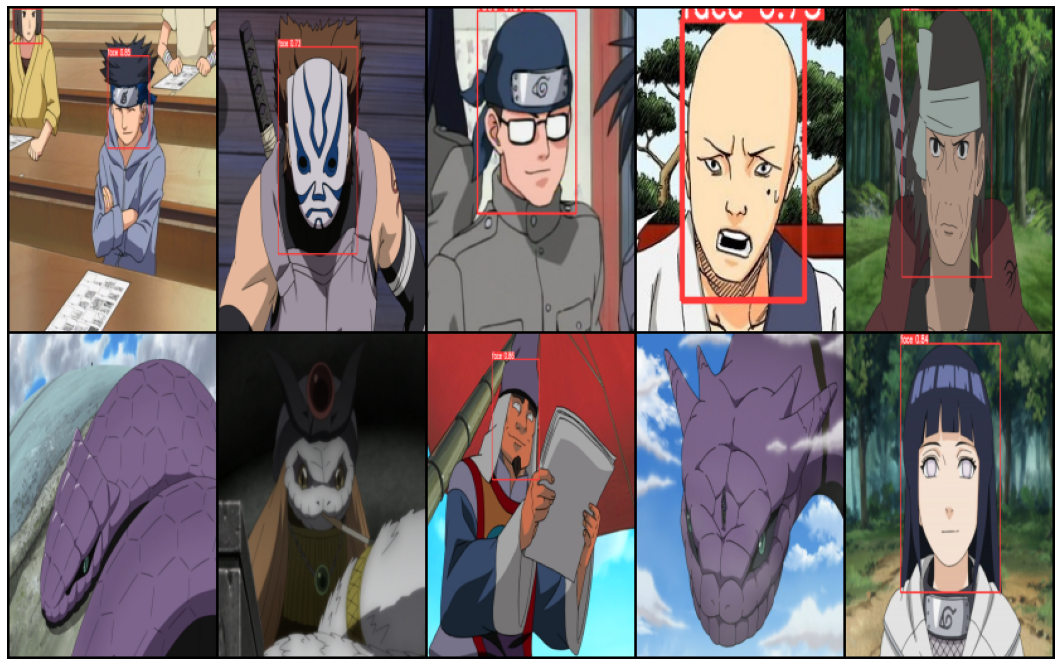

In [ ]:
img_paths = list(Path("runs/detect/exp").glob("*.png"))[:10]
show_grid(img_paths)